## Parte 2
### 1.
Utilice su código de red neuronal para el problema de reconocimiento de dígitos MNIST del Taller 2 para estudiar cómo var ́ıa el desempeño de la red (en términos generales) en función del número de capas ocultas. Describa sus observaciones

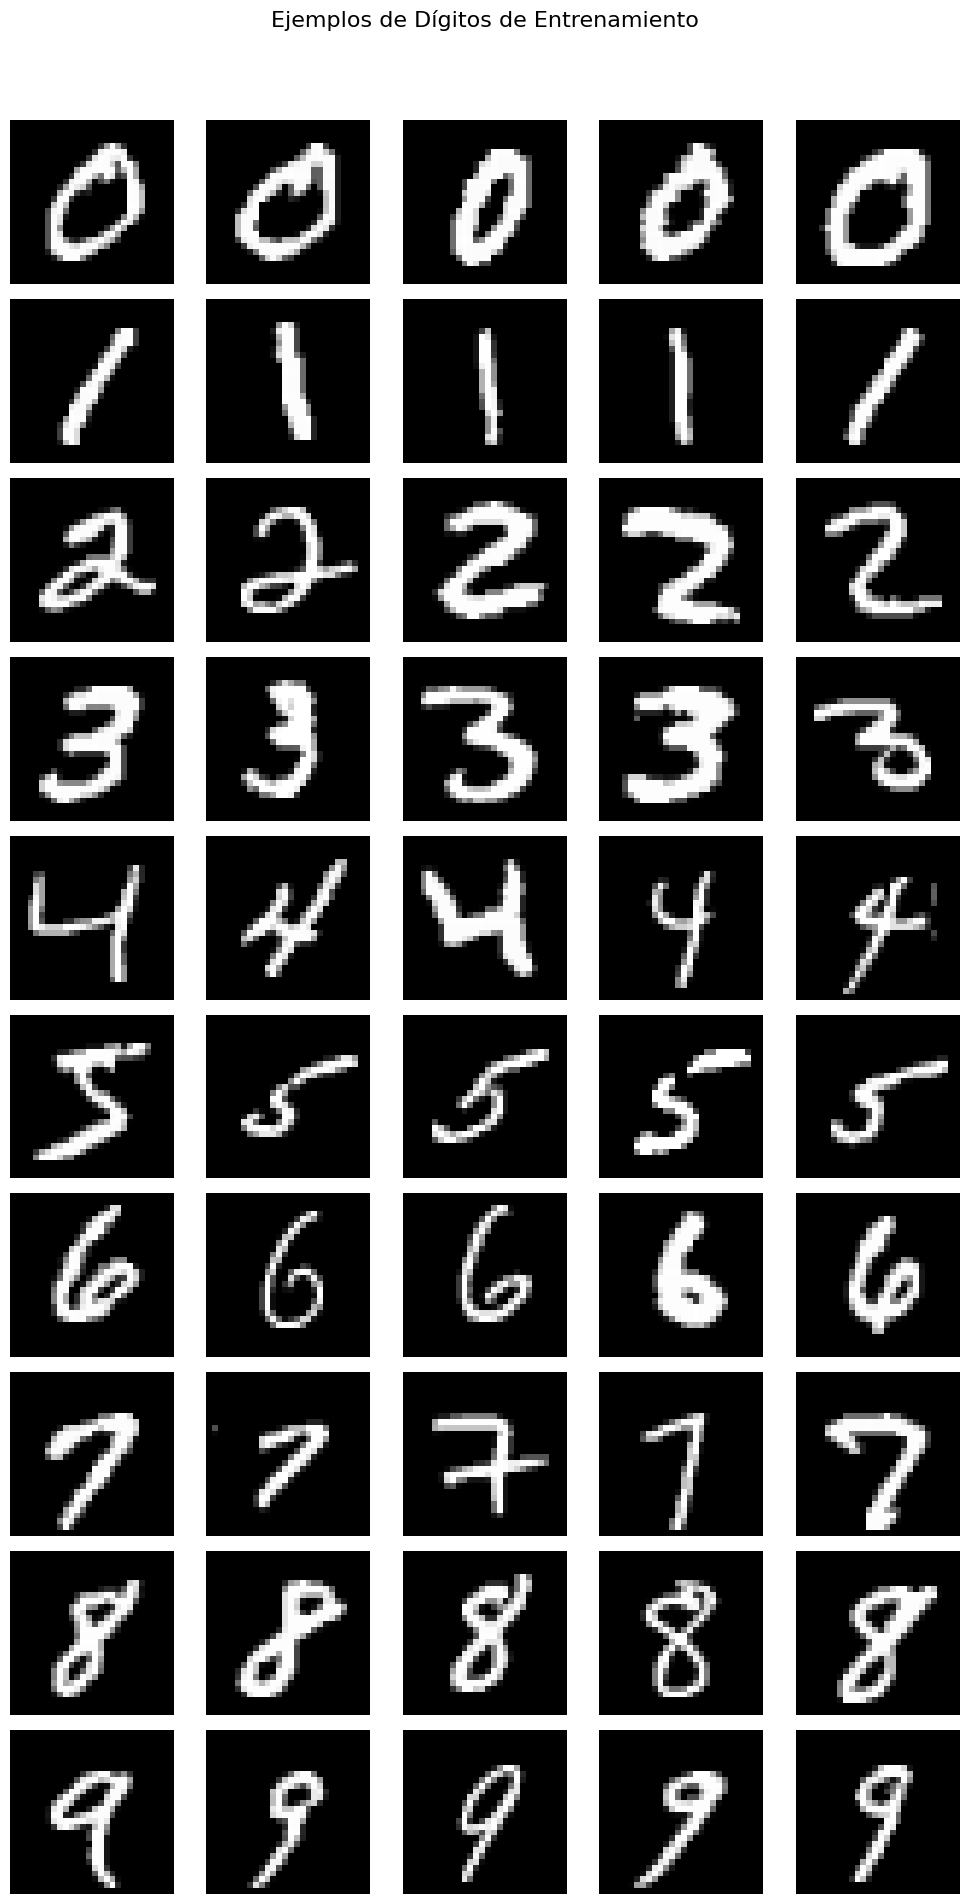

In [1]:
import os
os.chdir('I:/Mi unidad/Estudio/UniAndes/Semestre_3/Modelos avanzados 2/modelos_avanzados_deep_learning')
from Talleres.Taller2.Solucion.parte_practica.main import entrenar_y_medir, load_df
from joblib import Parallel, delayed
from tqdm import tqdm

training_data, test_data = load_df()

In [2]:
net_configs = []
epochs = 20
mini_batch_size = 10
eta = 0.1

# Configuración 1: Sin capas ocultas (perceptrón simple)
net_configs.append({
    'architecture': [784, 10],  # Sin capas ocultas
    'epochs': epochs,
    'mini_batch_size': mini_batch_size,
    'eta': eta
})

# Configuración 2: 1 capa oculta
net_configs.append({
    'architecture': [784, 30, 10],  # 1 capa oculta con 30 neuronas
    'epochs': epochs,
    'mini_batch_size': mini_batch_size,
    'eta': eta
})

# Configuración 3: 2 capas ocultas
net_configs.append({
    'architecture': [784, 64, 32, 10],  # 2 capas ocultas con 64 y 32 neuronas
    'epochs': epochs,
    'mini_batch_size': mini_batch_size,
    'eta': eta
})

# Configuración 4: 3 capas ocultas
net_configs.append({
    'architecture': [784, 128, 64, 32, 10],  # 3 capas ocultas con 128, 64 y 32 neuronas
    'epochs': epochs,
    'mini_batch_size': mini_batch_size,
    'eta': eta
})

# Configuración 5: 4 capas ocultas
net_configs.append({
    'architecture': [784, 256, 128, 64, 32, 10],  # 4 capas ocultas con 256, 128, 64 y 32 neuronas
    'epochs': epochs,
    'mini_batch_size': mini_batch_size,
    'eta': eta
})

In [ ]:
# Ejecutar el proceso en paralelo usando joblib.Parallel
results = Parallel(
    n_jobs=-1, backend='loky', prefer="processes"
)(
    delayed(entrenar_y_medir)(config, training_data, test_data) for config in tqdm(net_configs, desc='Procesando configuraciones')
)

Procesando configuraciones: 100%|██████████| 5/5 [00:00<00:00, 454.48it/s]


### 2.
Implemente regularización de tipo L2 y L1, mejore la iniciación de pesos seg ́un lo visto en clase y eval ́ue nuevamente su red (usando diferentes valores de hiperparámetros). ¿Qué puede decir acerca del aprendizaje y desempeño de su red con respecto a los resultados del Taller 2?

In [2]:
from Talleres.Taller3.Solucion.main import entrenar_y_medir

net_configs2 = []
epochs = 20
mini_batch_size = 10

for reg in ['L1', 'L2']:
    # Configuración 1: Sin capas ocultas (perceptrón simple)
    net_configs2.append({
        'architecture': [784, 10],  # Sin capas ocultas
        'epochs': epochs,
        'mini_batch_size': mini_batch_size,
        'eta': 0.1,  # Tasa de aprendizaje
        'lmbda': 0.0,  # Sin regularización
        'regularization': reg
    })

    # Configuración 2: 1 capa oculta
    net_configs2.append({
        'architecture': [784, 30, 10],  # 1 capa oculta con 30 neuronas
        'epochs': epochs,
        'mini_batch_size': mini_batch_size,
        'eta': 0.05,  # Tasa de aprendizaje moderada
        'lmbda': 0.01,  # Regularización L2 moderada
        'regularization': reg
    })

    # Configuración 3: 2 capas ocultas
    net_configs2.append({
        'architecture': [784, 64, 32, 10],  # 2 capas ocultas con 64 y 32 neuronas
        'epochs': epochs,
        'mini_batch_size': mini_batch_size,
        'eta': 0.01,  # Tasa de aprendizaje baja
        'lmbda': 0.1,  # Regularización L2 alta
        'regularization': reg
    })

    # Configuración 4: 3 capas ocultas
    net_configs2.append({
        'architecture': [784, 128, 64, 32, 10],  # 3 capas ocultas con 128, 64 y 32 neuronas
        'epochs': epochs,
        'mini_batch_size': mini_batch_size,
        'eta': 0.001,  # Tasa de aprendizaje muy baja
        'lmbda': 0.5,  # Regularización L2 fuerte
        'regularization': reg
    })

    # Configuración 5: 4 capas ocultas
    net_configs2.append({
        'architecture': [784, 256, 128, 64, 32, 10],  # 4 capas ocultas con 256, 128, 64 y 32 neuronas
        'epochs': epochs,
        'mini_batch_size': mini_batch_size,
        'eta': 0.0005,  # Tasa de aprendizaje muy baja
        'lmbda': 1.0,  # Regularización L2 muy fuerte
        'regularization': reg
    })

In [3]:
# Ejecutar el proceso en paralelo usando joblib.Parallel
results2 = Parallel(
    n_jobs=-1, backend='loky', prefer="processes"
)(
    delayed(entrenar_y_medir)(config, training_data, test_data) for config in tqdm(net_configs2, desc='Procesando configuraciones')
)

Procesando configuraciones: 100%|██████████| 10/10 [00:00<00:00, 907.15it/s]


KeyboardInterrupt: 